# [Week7] 이미지 분석 활용 맛보기

* 과제
    * 문제 1번을 풀어주세요.
    * `2~3번`의 각 실행 코드를 실행해보며, 자신이 이해하기 편하도록 코드를 분석하여 `주석`을 달아주세요.
    * `4번`의 맨 마지막 실습은 `직접 코드를 작성`해주세요.

## 1. 라이브러리 설치

### (1) cvlib : 객체인식, 얼굴인식, 성별인식

* 참고 링크 : [cvlib docs](https://docs.cvlib.net/)
* 혹시 아래 라이브러리를 설치하다가 버전 문제가 생길 때(특히 tensorflow), 해결하기 가장 쉬운 방법은 다음과 같습니다.
    * 주피터 노트북에서 새로운 가상환경을 만들기
    * 모든 라이브러리를 최신 버전으로 다시 다운 받기 (numpy 버전과 tensorflow 버전을 호환되게 맞추기)

In [1]:
# CVlib
!pip install cvlib

Processing c:\users\tjddu\appdata\local\pip\cache\wheels\20\d8\cf\95cbfb169614d5fbbfb5421c1cdda56e79152ecf7bb209bf12\cvlib-0.2.5-py3-none-any.whl
Processing c:\users\tjddu\appdata\local\pip\cache\wheels\bc\13\93\a9bf6b3d3966e4af014b0dbef027fdea47393faf47e990349f\progressbar-2.5-py3-none-any.whl
Processing c:\users\tjddu\appdata\local\pip\cache\wheels\27\4d\3a\6dcdf7c3ebc87bf1ae013d96c9cf060ccfe334bb5ee769f377\imutils-0.5.3-py3-none-any.whl
  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)


In [2]:
# tensorflow
!pip install tensorflow

In [2]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import numpy as np

> __문제 1번 : cvlib 이용 시 매개변수로 넣는 이미지의 기본 컬러공간(color space)은 무엇이어야 할까요?__

* 답변 : BGR

## 2. 라이브러리 사용 실습

* 참고 링크 : https://github.com/arunponnusamy/cvlib

### 2-1. 객체인식(Object Detection)

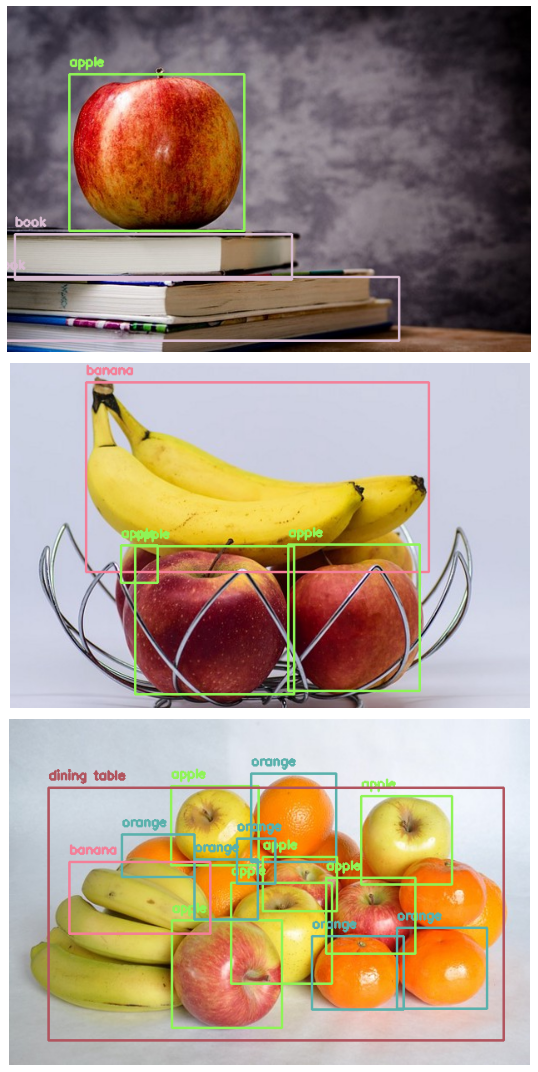

In [7]:
fig = plt.figure(figsize=(15,15))
for i in range(1, 4):
    image_path = './image/image'+ str(i) +'.jpeg'
    im = cv2.imread(image_path) #read image
    
    # detected objects in the image
    # return the bounding box co-ordinates, corrensponding labels and confidence scores for the detected objects
    bbox, label, conf = cv.detect_common_objects(im)
    
    # draw bounding box around detected objects 
    output_image = draw_bbox(im, bbox, label, conf)
    # Converts an image from one color space to another (#BRG to RGB)
    output_image = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(3, 1, i)
    plt.imshow(output_image)
    plt.axis('off')
plt.tight_layout()
plt.show()

### 2-2. 얼굴인식(Face Detection)

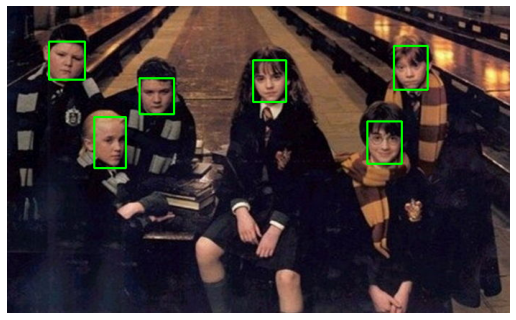

In [8]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path) # read image

# Detecting faces in an image
# return the bounding box corners and corresponding confidence for all the faces detected
faces, confidences = cv.detect_face(im)

# draw rectangle around detected faces 
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

### 2-3. 성별인식(Gender Detection)

45654016/45649168 [==============================] - 5s 0us/step
[INFO] Initializing gender detection model ..


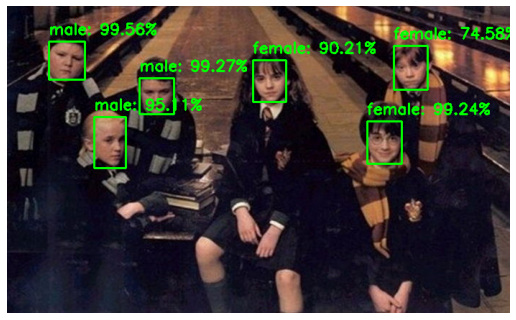

In [9]:
fig = plt.figure(figsize=(9,9))
image_path = './image/harrypotter.jpg'
im = cv2.imread(image_path)

faces, confidences = cv.detect_face(im)
for face in faces:
    (startX,startY) = face[0],face[1]
    (endX,endY) = face[2],face[3]
    
    # crop face image 
    face_crop = np.copy(im[startY:endY, startX:endX])
    
    # Detecting gender 
    # return the labels (man, woman) and associated probabilities
    (label, confidence) = cv.detect_gender(face_crop)

    # get the maximum confidence and corresponding lable
    idx = np.argmax(confidence)
    label = label[idx]
    label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    
    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # draw rectangle around detected faces and put label
    cv2.rectangle(im, (startX,startY), (endX,endY), (0,255,0), 2)
    cv2.putText(im, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.axis('off')
plt.show()

## 3. 웹캠 입출력

In [3]:
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    # read frame from webcam
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    # flipping around y-axis
    frame = cv2.flip(frame, 1)
    cv2.imshow("Real-time video", frame)
    
    # end the program when 'q' was pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

## 4. 나만의 프로그램 만들기 (직접 코드 작성)

* 실습 내용 : `웹캠 입출력`과 `객체인식 or 얼굴인식+성별인식` 코드를 합친 코드를 작성하세요.
    * 후보1 : 웹캠 입출력 + 객체인식 프로그램
    * 후보2 : 웹캠 입출력 + 얼굴인식+성별인식 프로그램

* 나의 선택 : 후보 ( 2 ) 번

In [5]:
# 직접 코드 작성

webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if not status:
        print("Could not read frame")
        exit()

    frame = cv2.flip(frame, 1)
    
    faces, confidences = cv.detect_face(frame)
    
    for face in faces:
        (startX,startY) = face[0],face[1]
        (endX,endY) = face[2],face[3]
    
        face_crop = np.copy(frame[startY:endY, startX:endX])
   
        (label, confidence) = cv.detect_gender(face_crop)

        idx = np.argmax(confidence)
        label = label[idx]
        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
    
        Y = startY - 10 if startY - 10 > 10 else startY + 10

        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,255,0), 2)
    
    cv2.imshow("Real-time video", frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()